# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [15]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

#!pip install matplotlib=="3.10.0"

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [20]:
# Try loading one file
import os

current_dir = os.getcwd()
trip_records_dir = os.path.abspath(os.path.join(current_dir, 'trip_records'))
file_path = os.path.join(trip_records_dir, '2023-1.parquet')

df = pd.read_parquet(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [26]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

# Set this to your local path where trip records are stored
trip_records_dir = '/Users/prasoojh/JupyterNotebooks/Yello_Taxi_Assignment/Datasets_and _Dictionary/trip_records'
taxi_zones_dir = '/Users/prasoojh/JupyterNotebooks/Yello_Taxi_Assignment/Datasets_and _Dictionary/taxi_zones'

In [28]:
# Change working directory to your folder containing monthly parquet files

# List parquet files in trip_records without changing directories
file_list = sorted([f for f in os.listdir(trip_records_dir) if f.endswith('.parquet')])

# Initialize an empty dataframe to hold sampled data across the year
yearly_sampled_df = pd.DataFrame()

# Iterate through each monthly file and sample
for file_name in file_list:
    try:
        file_path = os.path.join(trip_records_dir, file_name)
        print(f"Processing file: {file_name}")

        df_month = pd.read_parquet(file_path)
        df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])
        df_month['pickup_date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['pickup_hour'] = df_month['tpep_pickup_datetime'].dt.hour

        # Sample 5% of each hour per day for the month
        sampled_month = (
            df_month.groupby(['pickup_date', 'pickup_hour'], group_keys=False)
            .apply(lambda x: x.sample(frac=0.05, random_state=42) if len(x) > 0 else x)
        ).reset_index(drop=True)

        # Append monthly sampled data to yearly dataframe
        yearly_sampled_df = pd.concat([yearly_sampled_df, sampled_month], ignore_index=True)

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

# Add pickup_date and pickup_hour columns again if required (safe step)
yearly_sampled_df['pickup_date'] = yearly_sampled_df['tpep_pickup_datetime'].dt.date
yearly_sampled_df['pickup_hour'] = yearly_sampled_df['tpep_pickup_datetime'].dt.hour

print(f"Yearly sampled data shape before downsampling: {yearly_sampled_df.shape}")

# Set target size between 250k and 300k, picking a mid-point
target_size = 275_000  

if len(yearly_sampled_df) > target_size:
    # Calculate downsampling fraction
    downsample_fraction = target_size / len(yearly_sampled_df)

    # Perform final proportional downsampling by date & hour
    final_downsampled = (
        yearly_sampled_df.groupby(['pickup_date', 'pickup_hour'], group_keys=False)
        .apply(lambda x: x.sample(frac=downsample_fraction, random_state=42) if len(x) > 0 else x)
        .reset_index(drop=True)
    )
else:
    final_downsampled = yearly_sampled_df.copy()

print(f"Final downsampled data shape: {final_downsampled.shape}")

Processing file: 2023-1.parquet
Processing file: 2023-10.parquet
Processing file: 2023-11.parquet
Processing file: 2023-12.parquet
Processing file: 2023-2.parquet
Processing file: 2023-3.parquet
Processing file: 2023-4.parquet
Processing file: 2023-5.parquet
Processing file: 2023-6.parquet
Processing file: 2023-7.parquet
Processing file: 2023-8.parquet
Processing file: 2023-9.parquet
Processing file: final_sampled.parquet
Processing file: final_sampled_yellow_taxi.parquet
Processing file: sampled_df.parquet
Yearly sampled data shape before downsampling: (1928613, 22)
Final downsampled data shape: (274908, 22)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [30]:
# Store the df in csv/parquet
final_downsampled.to_parquet('final_sampled.parquet')

In [31]:
final_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274908 entries, 0 to 274907
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               274908 non-null  int64         
 1   tpep_pickup_datetime   274908 non-null  datetime64[us]
 2   tpep_dropoff_datetime  274908 non-null  datetime64[us]
 3   passenger_count        265679 non-null  float64       
 4   trip_distance          274908 non-null  float64       
 5   RatecodeID             265679 non-null  float64       
 6   store_and_fwd_flag     265679 non-null  object        
 7   PULocationID           274908 non-null  int64         
 8   DOLocationID           274908 non-null  int64         
 9   payment_type           274908 non-null  int64         
 10  fare_amount            274908 non-null  float64       
 11  extra                  274908 non-null  float64       
 12  mta_tax                274908 non-null  floa

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [34]:
# Load the new data file
df = pd.read_parquet('final_sampled.parquet')

In [35]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:04:34   2023-01-01 00:17:32              1.0   
1         2  2023-01-01 00:31:20   2023-01-01 00:39:46              1.0   
2         2  2023-01-01 00:09:50   2023-01-01 00:29:48              2.0   
3         1  2023-01-01 00:45:06   2023-01-01 00:54:06              1.0   
4         2  2023-01-01 00:57:51   2023-01-01 01:01:32              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.60         1.0                  N           125           186   
1           1.09         1.0                  N           161           237   
2           5.15         1.0                  N           234             7   
3           0.00         1.0                  N            48            48   
4           0.55         1.0                  N           234           170   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        3.00           0.0   
1             1  ...      0.5        3.75           0.0   
2             1  ...      0.5        5.94           0.0   
3             2  ...      0.5        0.00           0.0   
4             1  ...      0.5        2.16           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         20.80                   2.5          0.0   
1                    1.0         18.75                   2.5          0.0   
2                    1.0         35.64                   2.5          0.0   
3                    1.0         13.60                   2.5          0.0   
4                    1.0         12.96                   2.5          0.0   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274908 entries, 0 to 274907
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               274908 non-null  int64         
 1   tpep_pickup_datetime   274908 non-null  datetime64[us]
 2   tpep_dropoff_datetime  274908 non-null  datetime64[us]
 3   passenger_count        265679 non-null  float64       
 4   trip_distance          274908 non-null  float64       
 5   RatecodeID             265679 non-null  float64       
 6   store_and_fwd_flag     265679 non-null  object        
 7   PULocationID           274908 non-null  int64         
 8   DOLocationID           274908 non-null  int64         
 9   payment_type           274908 non-null  int64         
 10  fare_amount            274908 non-null  float64       
 11  extra                  274908 non-null  float64       
 12  mta_tax                274908 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [39]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [41]:
# Combine the two airport fee columns
# Approach - Creating a combined column by adding them and skipping Na
df['airport_fee_combined'] = df[['airport_fee', 'Airport_fee']].sum(axis=1, skipna=True)
# Dropping old columns
df = df.drop(['airport_fee', 'Airport_fee'], axis=1)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [43]:
# check where values of fare amount are negative
negative_fare_rows = df[df['fare_amount'] < 0]
negative_fare_rows.head()


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, airport_fee_combined]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [45]:
# Analyse RatecodeID for the negative fare amounts
negative_RatecodeID_rows = df[df['RatecodeID'] < 0]
negative_RatecodeID_rows.head()


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, airport_fee_combined]
Index: []

[0 rows x 21 columns]

In [46]:
# Find which columns have negative values
negative_columns = []

for col in df.select_dtypes(include=['float', 'int']).columns:
    if (df[col] < 0).any():
        negative_columns.append(col)

print("Columns with negative values:", negative_columns)

Columns with negative values: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_combined']


In [47]:
# fix these negative values
#Dropping rows where total_amount is -ve
df = df[df['total_amount'] >= 0].reset_index(drop=True)

In [48]:
# Rechecking if any columns having -ve values
negative_columns = []

for col in df.select_dtypes(include=['float', 'int']).columns:
    if (df[col] < 0).any():
        negative_columns.append(col)

print("Columns with negative values:", negative_columns)

Columns with negative values: []


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [51]:
# Find the proportion of missing values in each column
missing_proportion = df.isnull().mean()
print(missing_proportion)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033572
trip_distance            0.000000
RatecodeID               0.033572
store_and_fwd_flag       0.033572
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.033572
pickup_date              0.000000
pickup_hour              0.000000
airport_fee_combined     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [53]:
# Display the rows with null values
df[df['passenger_count'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
18             2  2023-01-01 00:58:50   2023-01-01 01:17:07              NaN   
22             2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
23             2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
38             2  2023-01-01 01:53:13   2023-01-01 02:16:32              NaN   
68             2  2023-01-01 01:26:00   2023-01-01 01:52:00              NaN   
...          ...                  ...                   ...              ...   
274848         2  2023-12-31 22:54:56   2023-12-31 23:05:42              NaN   
274853         2  2023-12-31 22:52:35   2023-12-31 23:04:09              NaN   
274858         1  2023-12-31 22:13:07   2023-12-31 22:41:51              NaN   
274866         2  2023-12-31 22:36:14   2023-12-31 23:07:55              NaN   
274889         2  2023-12-31 23:05:29   2023-12-31 23:09:42              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
18               4.43         NaN               None            33   
22               2.74         NaN               None            90   
23               4.52         NaN               None           114   
38               5.61         NaN               None           255   
68              11.14         NaN               None            87   
...               ...         ...                ...           ...   
274848           1.69         NaN               None           239   
274853           4.81         NaN               None           262   
274858           0.00         NaN               None           238   
274866          14.18         NaN               None            71   
274889           1.44         NaN               None           141   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
18                68             0  ...    0.0      0.5        4.37   
22                48             0  ...    0.0      0.5        3.37   
23               262             0  ...    0.0      0.5        0.00   
38               233             0  ...    0.0      0.5        4.92   
68               152             0  ...    0.0      0.5       10.52   
...              ...           ...  ...    ...      ...         ...   
274848           237             0  ...    0.0      0.5        0.00   
274853            79             0  ...    0.0      0.5        0.00   
274858           148             0  ...    0.0      0.5        0.00   
274866           203             0  ...    0.0      0.5        0.00   
274889           263             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
18               0.0                    1.0         33.50   
22               0.0                    1.0         25.85   
23               0.0                    1.0         29.38   
38               0.0                    1.0         29.52   
68               0.0                    1.0         63.14   
...              ...                    ...           ...   
274848           0.0                    1.0         15.79   
274853           0.0                    1.0         22.99   
274858           0.0                    1.0         39.39   
274866           0.0                    1.0         50.81   
274889           0.0                    1.0         12.74   

        congestion_surcharge  pickup_date pickup_hour  airport_fee_combined  
18                       NaN   2023-01-01           0                   0.0  
22                       NaN   2023-01-01           0                   0.0  
23                       NaN   2023-01-01           0                   0.0  
38                       NaN   2023-01-01           1                   0.0  
68                       NaN   2023-01-01           1                   0.0  
...                      ...          ...         ...                   ...  
274848                   NaN   2023-12-31          22                   0.

In [54]:
# Impute NaN values in 'passenger_count'
# Replacing NaN values with mode value
mode_pc = df['passenger_count'].mode()[0]
df['passenger_count'] = df['passenger_count'].fillna(mode_pc)

Did you find zeroes in passenger_count? Handle these.

In [56]:
# Yes found 4338 zeroes in passenger_count - Replacing them with mode value.
# Assuming Driver not updated passenger_count
df['passenger_count'] = df['passenger_count'].replace(0, mode_pc)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [58]:
# Fix missing values in 'RatecodeID'
# Imputing RatecodeID with the mode value 1.0
df['RatecodeID'] = df['RatecodeID'].fillna(1.0)

# Also found invalid code 99.0  imputing with mode value 1.0
df.loc[df['RatecodeID'] == 99.0, 'RatecodeID'] = 1.0
# Checking post imputation
print(df['RatecodeID'].value_counts(dropna=False))

RatecodeID
1.0    261558
2.0     10451
5.0      1457
3.0       888
4.0       545
Name: count, dtype: int64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [60]:
# handle null values in congestion_surcharge
# Imputing congestion_surcharge with the mode value 2.5
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(2.5)
print(df['congestion_surcharge'].value_counts(dropna=False))


congestion_surcharge
2.5    254692
0.0     20207
Name: count, dtype: int64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [62]:
# Handle any remaining missing values
# Found some None value in store_and_fwd_flag
# Imputing store_and_fwd_flag None with mode value 'N'
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')
print(df['store_and_fwd_flag'].value_counts(dropna=False))

store_and_fwd_flag
N    273314
Y      1585
Name: count, dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [65]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe(include='all').transpose()


count unique         top    freq  \
VendorID               274899.0    NaN         NaN     NaN   
tpep_pickup_datetime     274899    NaN         NaN     NaN   
tpep_dropoff_datetime    274899    NaN         NaN     NaN   
passenger_count        274899.0    NaN         NaN     NaN   
trip_distance          274899.0    NaN         NaN     NaN   
RatecodeID             274899.0    NaN         NaN     NaN   
store_and_fwd_flag       274899      2           N  273314   
PULocationID           274899.0    NaN         NaN     NaN   
DOLocationID           274899.0    NaN         NaN     NaN   
payment_type           274899.0    NaN         NaN     NaN   
fare_amount            274899.0    NaN         NaN     NaN   
extra                  274899.0    NaN         NaN     NaN   
mta_tax                274899.0    NaN         NaN     NaN   
tip_amount             274899.0    NaN         NaN     NaN   
tolls_amount           274899.0    NaN         NaN     NaN   
improvement_surcharge  274899.0    NaN         NaN     NaN   
total_amount           274899.0    NaN         NaN     NaN   
congestion_surcharge   274899.0    NaN         NaN     NaN   
pickup_date              274899    365  2023-12-14    1038   
pickup_hour            274899.0    NaN         NaN     NaN   
airport_fee_combined   274899.0    NaN         NaN     NaN   

                                             mean                  min  \
VendorID                                 1.732702                  1.0   
tpep_pickup_datetime   2023-07-02 20:10:12.380165  2023-01-01 00:04:34   
tpep_dropoff_datetime  2023-07-02 20:27:38.493035  2023-01-01 00:09:35   
passenger_count                          1.371682                  1.0   
trip_distance                            3.767115                  0.0   
RatecodeID                               1.071626                  1.0   
store_and_fwd_flag                            NaN                  NaN   
PULocationID                            165.50918                  1.0   
DOLocationID                           164.153715                  1.0   
payment_type                              1.16398                  0.0   
fare_amount                             19.840368                  0.0   
extra                                    1.594199                  0.0   
mta_tax                                  0.495399                  0.0   
tip_amount                               3.559298                  0.0   
tolls_amount                             0.600857                  0.0   
improvement_surcharge                    0.999051                  0.0   
total_amount                             28.92635                  0.0   
congestion_surcharge                     2.316233                  0.0   
pickup_date                                   NaN                  NaN   
pickup_hour                             14.266491                  0.0   
airport_fee_combined                     0.138544                  0.0   

                                              25%                  50%  \
VendorID                                      1.0                  2.0   
tpep_pickup_datetime   2023-04-02 16:08:50.500000  2023-06-27 16:25:35   
tpep_dropoff_datetime  2023-04-02 16:25:59.500000  2023-06-27 16:44:48   
passenger_count                               1.0                  1.0   
trip_distance                                1.05                  1.8   
RatecodeID                                    1.0                  1.0   
store_and_fwd_flag                            NaN                  NaN   
PULocationID                                132.0                162.0   
DOLocationID                                114.0                162.0   
payment_type                                  1.0                  1.0   
fare_amount                                   9.3                 13.5   
extra                                         0.0                  1.0   
mta_tax                                       0.5                  0.5

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [69]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6].reset_index(drop=True)

# To verify if the passenger_count > 6 is removed.
#invalid_passenger_count = df[df['passenger_count'] > 6]
#print(invalid_passenger_count.shape)

In [70]:
# Continue with outlier handling

# Setting  threshold 99th percentile for trip_distance, fare_amount, tolls_amount, total_amount

trip_distance_99 = df['trip_distance'].quantile(0.99)
df = df[df['trip_distance'] <= trip_distance_99].reset_index(drop=True)

fare_amount_99 = df['fare_amount'].quantile(0.99)
df = df[df['fare_amount'] <= fare_amount_99].reset_index(drop=True)

tip_amount_99 = df['tip_amount'].quantile(0.99)
df = df[df['tip_amount'] <= tip_amount_99].reset_index(drop=True)

tolls_amount_99 = df['tolls_amount'].quantile(0.99)
df = df[df['tolls_amount'] <= tolls_amount_99].reset_index(drop=True)

total_amount_99 = df['total_amount'].quantile(0.99)
df = df[df['total_amount'] <= total_amount_99].reset_index(drop=True)

print(f"After removing outlier from different numeric columns: {df.shape}")



After removing outlier from different numeric columns: (263987, 21)


In [71]:
# Do any columns need standardising?

mean_trip = df['trip_distance'].mean()
std_trip = df['trip_distance'].std()

df['trip_distance_std'] = (df['trip_distance'] - mean_trip) / std_trip

#df[['trip_distance', 'trip_distance_std']].describe()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [73]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'airport_fee_combined',
 'trip_distance_std']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [78]:
# Find and show the hourly trends in taxi pickups

hourly_trend = df.groupby('pickup_hour').size().reset_index(name='count')
plt.figure(figsize=(10,6))
sns.lineplot(data=hourly_trend, x='pickup_hour', y='count', marker='o')
plt.title('Hourly Trend of Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()

In [79]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_dayofweek'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day_name()

daily_trend = df.groupby('pickup_dayofweek').size().reset_index(name='count')
# Order days correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trend['pickup_dayofweek'] = pd.Categorical(daily_trend['pickup_dayofweek'], categories=days_order, ordered=True)
daily_trend = daily_trend.sort_values('pickup_dayofweek')

plt.figure(figsize=(10,6))
sns.barplot(data=daily_trend, x='pickup_dayofweek', y='count', palette='viridis')
plt.title('Daily Trend of Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()

In [80]:
df['pickup_dayofweek'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day_name()
print(df['pickup_dayofweek'].value_counts())

pickup_dayofweek
Thursday     41399
Wednesday    40556
Friday       39231
Saturday     38790
Tuesday      38236
Sunday       33094
Monday       32681
Name: count, dtype: int64


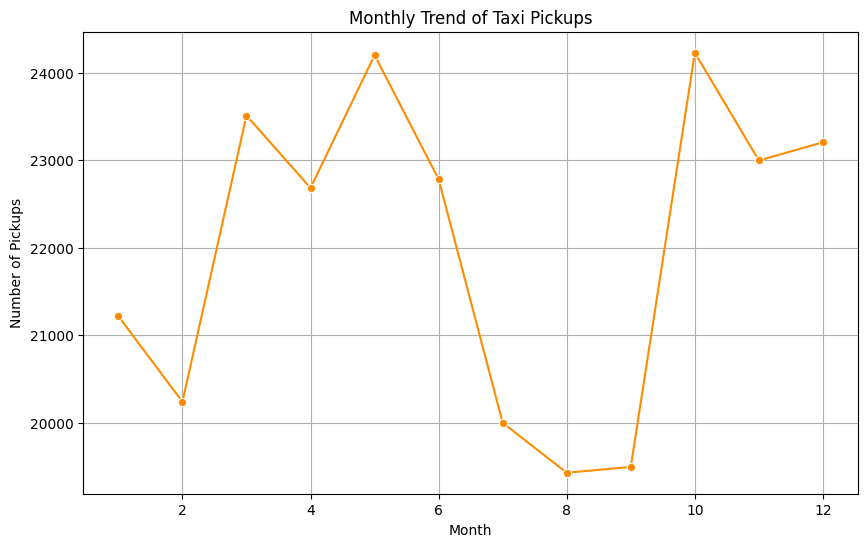

In [81]:
# Show the monthly trends in pickups

df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month
monthly_trend = df.groupby('pickup_month').size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_trend, x='pickup_month', y='count', marker='o', color='darkorange')
plt.title('Monthly Trend of Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [84]:
# Analyse the above parameters

financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_columns:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}: Zero values = {zero_count}, Negative values = {negative_count}")

fare_amount: Zero values = 77, Negative values = 0
tip_amount: Zero values = 61091, Negative values = 0
total_amount: Zero values = 42, Negative values = 0
trip_distance: Zero values = 4843, Negative values = 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [87]:
# Create a df with non zero entries for the selected parameters.
df = df[
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
].reset_index(drop=True)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [89]:
# Group data by month and analyse monthly revenue

monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()
monthly_revenue.columns = ['Month', 'Total_Revenue']
print(monthly_revenue)

    Month  Total_Revenue
0       1      518619.06
1       2      494173.25
2       3      587692.86
3       4      577213.96
4       5      629390.38
5       6      588736.01
6       7      507053.79
7       8      493525.82
8       9      503556.47
9      10      627660.84
10     11      588733.20
11     12      594364.61


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [91]:
# Calculate proportion of each quarter

df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum().reset_index()
quarterly_revenue.columns = ['Quarter', 'Total_Revenue']

# Calculate proportion
quarterly_revenue['Proportion'] = (quarterly_revenue['Total_Revenue'] / quarterly_revenue['Total_Revenue'].sum()) * 100
print(quarterly_revenue)

   Quarter  Total_Revenue  Proportion
0        1     1600485.17   23.849678
1        2     1795340.35   26.753318
2        3     1504136.08   22.413929
3        4     1810758.65   26.983075


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [93]:
# Show how trip fare is affected by distance
df_nonzero_distance = df[df['trip_distance'] > 0]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_nonzero_distance, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.xlim(0, 20)
plt.ylim(0, 75)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [95]:
# Show relationship between fare and trip duration
df_nonzero_distance['trip_duration'] = (df_nonzero_distance['tpep_dropoff_datetime'] - df_nonzero_distance['tpep_pickup_datetime']).dt.total_seconds() / 60
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_nonzero_distance, x='trip_duration', y='fare_amount', alpha=0.2)
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.xlim(0, 60) 
plt.ylim(0, 75)
plt.show()

# Correlation
correlation_fare_duration = df_nonzero_distance['fare_amount'].corr(df_nonzero_distance['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {correlation_fare_duration:.2f}")


Correlation between fare_amount and trip_duration: 0.24


In [96]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(8,5))
sns.boxplot(data=df_nonzero_distance, x='passenger_count', y='fare_amount')
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.ylim(0, 75)
plt.show()

correlation_fare_passengers = df_nonzero_distance['fare_amount'].corr(df_nonzero_distance['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {correlation_fare_passengers:.2f}")

Correlation between fare_amount and passenger_count: 0.03


In [97]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_nonzero_distance, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

correlation_tip_distance = df_nonzero_distance['tip_amount'].corr(df_nonzero_distance['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {correlation_tip_distance:.2f}")


Correlation between tip_amount and trip_distance: 0.47


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

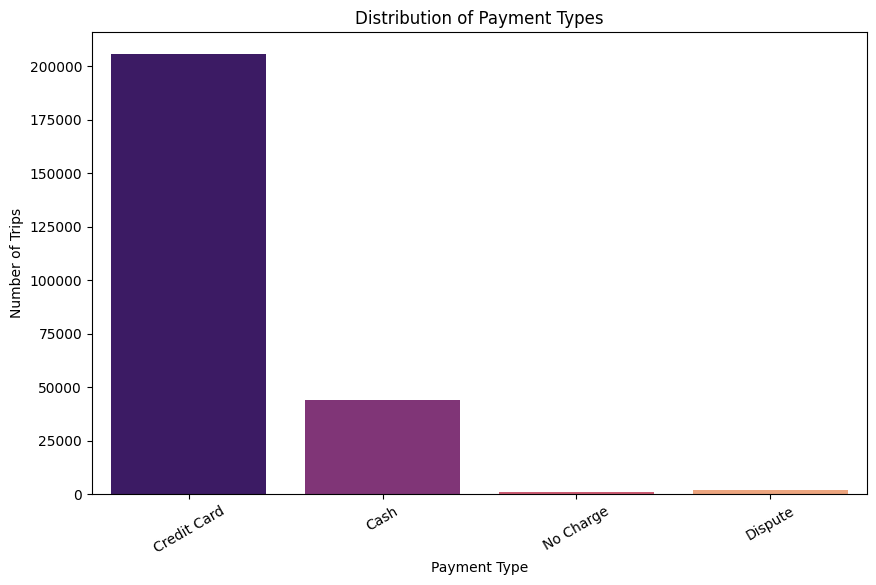

In [99]:
# Analyse the distribution of different payment types (payment_type).

payment_type_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

# Clean up rows with payment_type = 0
df_nonzero_distance_cleaned = df_nonzero_distance[df_nonzero_distance['payment_type'] != 0]

# calculate payment type counts after cleaning payment_type = 0
payment_type_counts_cleaned = df_nonzero_distance_cleaned['payment_type'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=[payment_type_labels.get(i, i) for i in payment_type_counts_cleaned.index],
            y=payment_type_counts_cleaned.values,
            palette="magma")
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=30)
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [104]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [106]:
import geopandas as gpd
taxi_zones_shp_file = os.path.join(taxi_zones_dir, 'taxi_zones.shp')
# Read the shapefile using geopandas
zones = gpd.read_file(taxi_zones_shp_file) # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

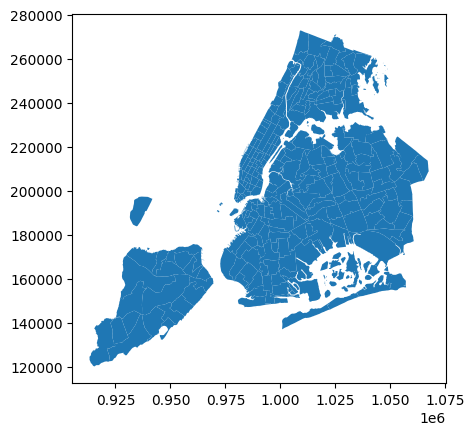

In [108]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [111]:
# Merge zones and trip records using locationID and PULocationID
df_merged = df.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')
df_merged.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:04:34   2023-01-01 00:17:32              1.0   
1         2  2023-01-01 00:31:20   2023-01-01 00:39:46              1.0   
2         2  2023-01-01 00:09:50   2023-01-01 00:29:48              2.0   
3         2  2023-01-01 00:57:51   2023-01-01 01:01:32              2.0   
4         2  2023-01-01 00:51:28   2023-01-01 01:09:54              4.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.60         1.0                  N           125           186   
1           1.09         1.0                  N           161           237   
2           5.15         1.0                  N           234             7   
3           0.55         1.0                  N           234           170   
4           9.18         1.0                  N           132           191   

   payment_type  ...  pickup_dayofweek  pickup_month  pickup_quarter  \
0             1  ...            Sunday             1               1   
1             1  ...            Sunday             1               1   
2             1  ...            Sunday             1               1   
3             1  ...            Sunday             1               1   
4             2  ...            Sunday             1               1   

   OBJECTID  Shape_Leng  Shape_Area            zone  LocationID    borough  \
0     125.0    0.049732    0.000076       Hudson Sq       125.0  Manhattan   
1     161.0    0.035804    0.000072  Midtown Center       161.0  Manhattan   
2     234.0    0.036072    0.000073        Union Sq       234.0  Manhattan   
3     234.0    0.036072    0.000073        Union Sq       234.0  Manhattan   
4     132.0    0.245479    0.002038     JFK Airport       132.0     Queens   

                                            geometry  
0  POLYGON ((983503.558 204621.022, 983654.398 20...  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  POLYGON ((987029.847 207022.299, 987048.27 206...  
3  POLYGON ((987029.847 207022.299, 987048.27 206...  
4  MULTIPOLYGON (((1032791.001 181085.006, 103283...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [113]:
# Group data by location and calculate the number of trips
trips_per_location = df.groupby('PULocationID').size().reset_index(name='total_trips')
trips_per_location = trips_per_location.sort_values(by='total_trips', ascending=False)
print(trips_per_location.head(10))


     PULocationID  total_trips
206           237        12747
137           161        12157
205           236        11397
138           162         9629
159           186         9060
119           142         8730
199           230         8681
115           138         8638
146           170         7966
109           132         7764


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [115]:
# Merge trip counts back to the zones GeoDataFrame

trips_per_location = df.groupby('PULocationID').size().reset_index(name='total_trips')
zones_with_trips = zones.merge(trips_per_location, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips['total_trips'] = zones_with_trips['total_trips'].fillna(0)


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

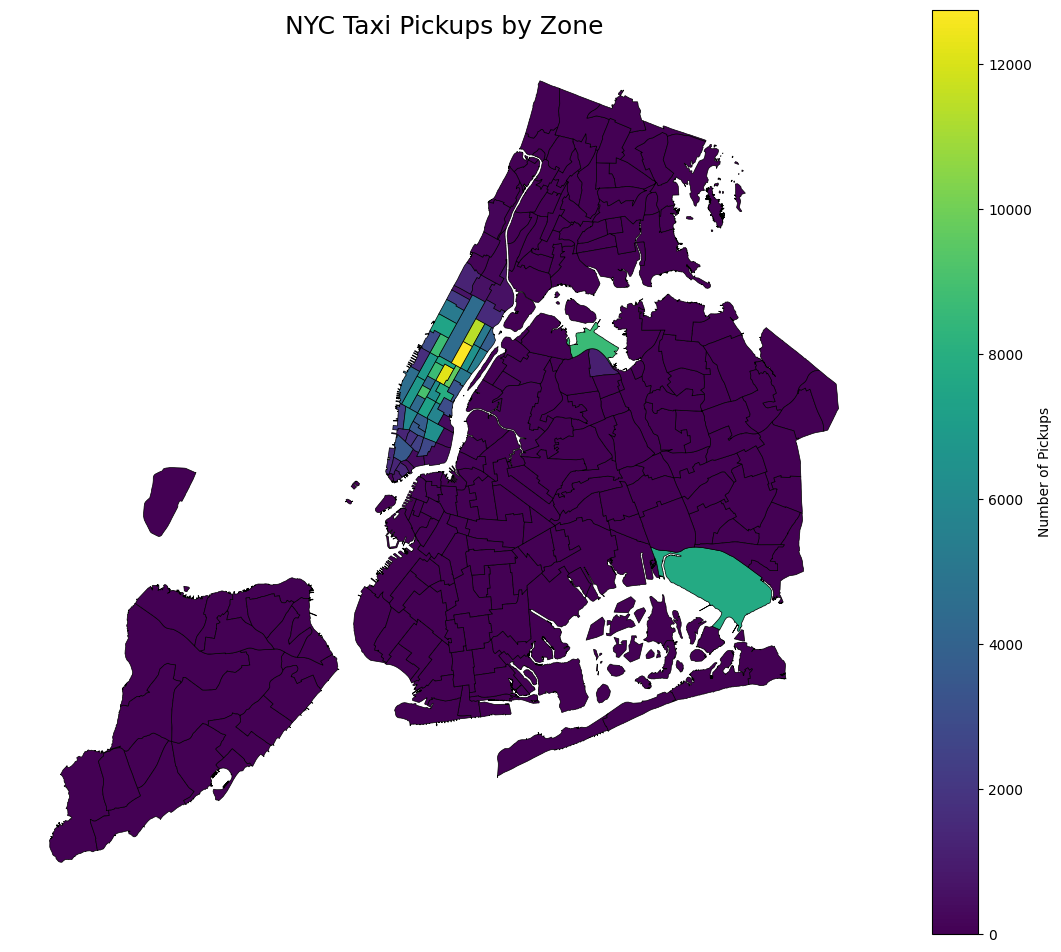

In [119]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Plot the map and display it

zones_with_trips.plot(
    column='total_trips',                   
    ax=ax,                                   
    cmap='viridis',                          
    linewidth=0.5,                           
    edgecolor='black',                       
    legend=True,                             
    legend_kwds={                           
        'label': "Number of Pickups",        
        'orientation': "vertical"
    }
)

ax.set_title('NYC Taxi Pickups by Zone', fontsize=18)
ax.set_axis_off()
plt.show()


In [120]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort the zones by total_trips in descending order
zones_sorted = zones_with_trips.sort_values(by='total_trips', ascending=False)

# Displaying the top 10 zones with the highest trips
zones_sorted[['zone', 'borough', 'total_trips']].head(10)

zone    borough  total_trips
236         Upper East Side South  Manhattan      12747.0
160                Midtown Center  Manhattan      12157.0
235         Upper East Side North  Manhattan      11397.0
161                  Midtown East  Manhattan       9629.0
185  Penn Station/Madison Sq West  Manhattan       9060.0
141           Lincoln Square East  Manhattan       8730.0
229     Times Sq/Theatre District  Manhattan       8681.0
137             LaGuardia Airport     Queens       8638.0
169                   Murray Hill  Manhattan       7966.0
131                   JFK Airport     Queens       7764.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [129]:
# Find routes which have the slowest speeds at different times of the day

df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration_min'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60
df_valid = df[(df['trip_duration_min'] > 1) & (df['trip_distance'] > 0)]
df_valid['pickup_hour'] = df_valid['pickup_datetime'].dt.hour
# Add duration in hours column
df_valid['trip_duration_hr'] = df_valid['trip_duration_min'] / 60

# Group by route and hour
route_hourly_speed = df_valid.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg({
    'trip_distance': 'mean',
    'trip_duration_hr': 'mean',
    'VendorID': 'count'
}).reset_index().rename(columns={'VendorID': 'trip_count'})

# Calculate speed (miles per hour)
route_hourly_speed['average_speed_mph'] = route_hourly_speed['trip_distance'] / route_hourly_speed['trip_duration_hr']
slow_routes_by_hour = route_hourly_speed.sort_values(by=['pickup_hour', 'average_speed_mph'])
top_slowest_routes = slow_routes_by_hour.groupby('pickup_hour').head(3)  # top 3 slowest routes per hour

In [130]:
top_slowest_routes

PULocationID  DOLocationID  pickup_hour  trip_distance  \
11839            88           144            0       1.780000   
8536             74           116            0       2.800000   
14340           100           234            0       1.204000   
32702           158           229            1       3.660000   
13951           100           145            1       4.330000   
...             ...           ...          ...            ...   
26515           141           146           22       2.780000   
11764            88           100           22       5.830000   
54380           243           243           23       0.680000   
43335           215           215           23       0.050000   
28001           142           230           23       1.013333   

       trip_duration_hr  trip_count  average_speed_mph  
11839         23.757778           1           0.074923  
8536          22.693056           1           0.123386  
14340          4.853556           5           0.248066  
32702         23.651667           1           0.154746  
13951         23.483889           1           0.184382  
...                 ...         ...                ...  
26515         12.131806           2           0.229150  
11764         23.573611           1           0.247310  
54380         23.727500           1           0.028659  
43335          0.451111           1           0.110837  
28001          2.684568           9           0.377466  

[72 rows x 7 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [133]:
# Visualise the number of trips per hour and find the busiest hour
# Add pickup hour if not already present
df_valid['pickup_hour'] = df_valid['pickup_datetime'].dt.hour

# Group by pickup_hour and count trips
trips_per_hour = df_valid.groupby('pickup_hour').size().reset_index(name='num_trips')

plt.figure(figsize=(12,6))
sns.barplot(x='pickup_hour', y='num_trips', data=trips_per_hour, palette="viridis")
plt.title('Number of Taxi Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0,24))
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [136]:
# Scale up the number of trips

# Filling in the value of sampling fraction and using that to scale up the numbers
sample_fraction = 0.05
top_5_hours = trips_per_hour.sort_values(by='num_trips', ascending=False).head(5)
top_5_hours['estimated_actual_trips'] = (top_5_hours['num_trips'] / sample_fraction).astype(int)
print(top_5_hours[['pickup_hour', 'num_trips', 'estimated_actual_trips']])


    pickup_hour  num_trips  estimated_actual_trips
18           18      18427                  368540
17           17      17391                  347820
19           19      16443                  328860
15           15      15861                  317220
16           16      15707                  314140


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

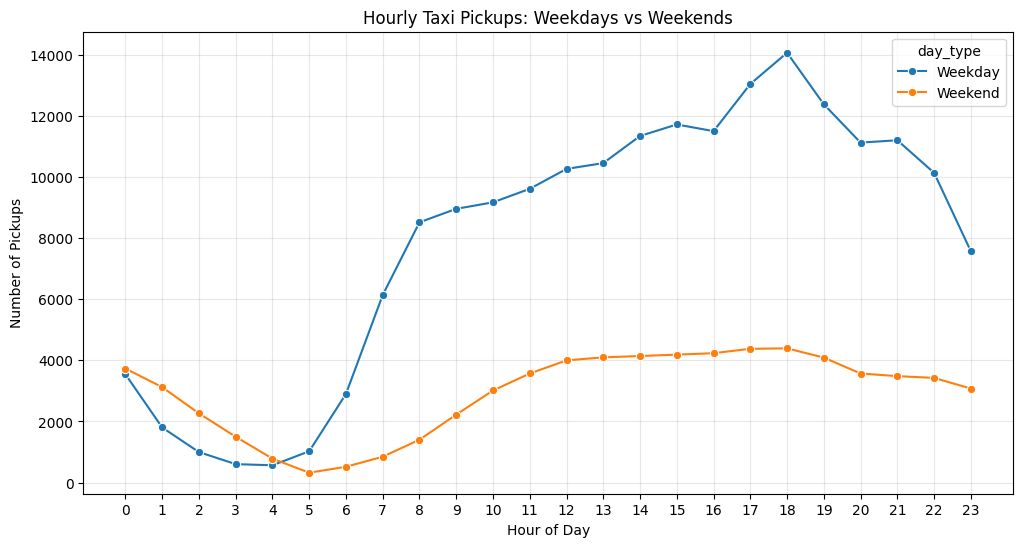

In [138]:
# Compare traffic trends for the week days and weekends

df['day_type'] = df['pickup_dayofweek'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)
traffic_trends = df.groupby(['pickup_hour', 'day_type']).size().reset_index(name='num_trips')
plt.figure(figsize=(12, 6))
sns.lineplot(data=traffic_trends, x='pickup_hour', y='num_trips', hue='day_type', marker='o')
plt.title('Hourly Taxi Pickups: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0,24))
plt.grid(True, alpha=0.3)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

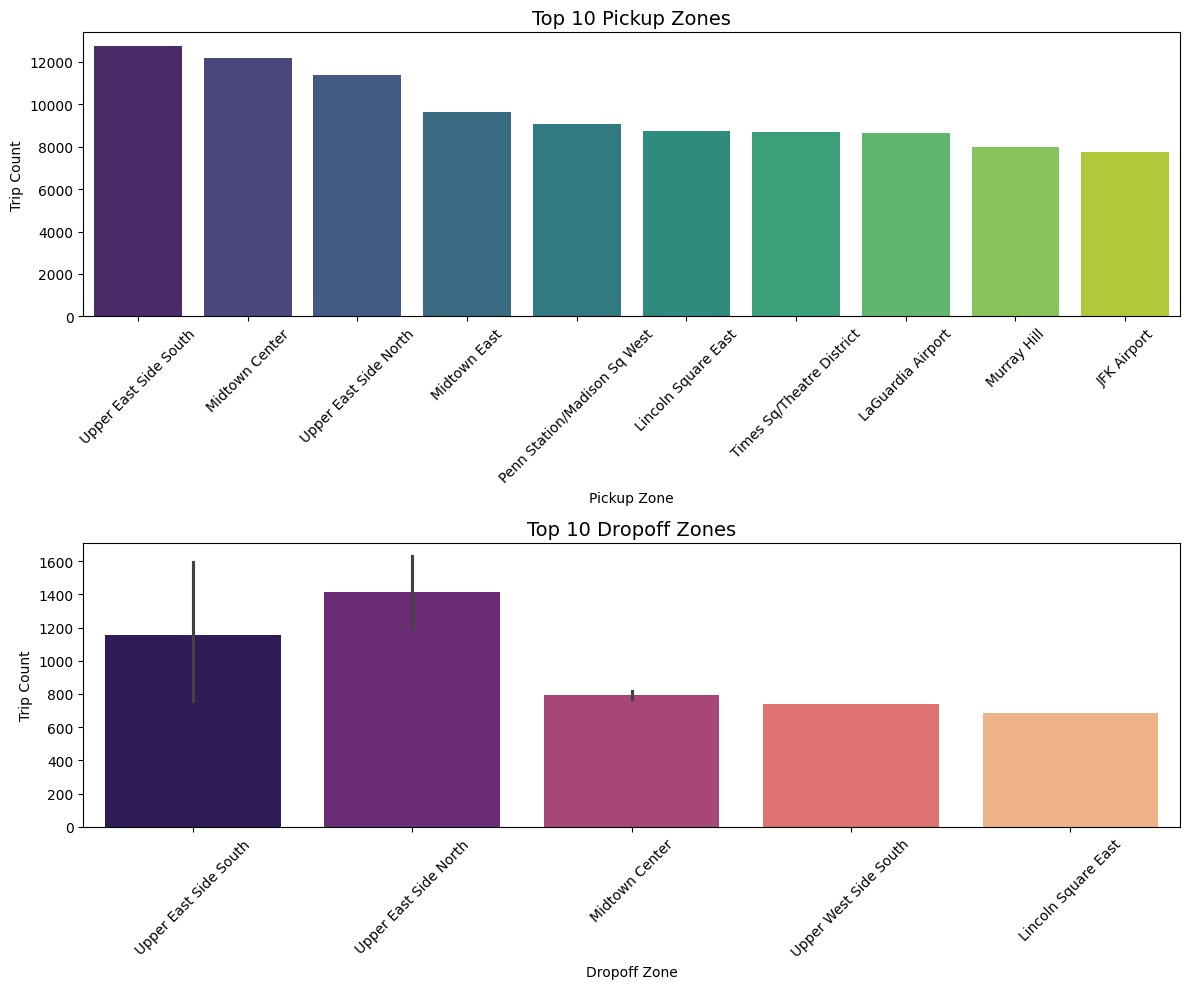

In [141]:
# Find top 10 pickup and dropoff zones

top_pickup_zones = (
    df_merged.groupby(['PULocationID', 'zone'])
    .size()
    .reset_index(name='trip_count')
    .sort_values(by='trip_count', ascending=False)
    .head(10)
)

#Top 10 Dropoff Zones
top_dropoff_zones = (
    df_merged.groupby(['DOLocationID', 'zone'])
    .size()
    .reset_index(name='trip_count')
    .sort_values(by='trip_count', ascending=False)
    .head(10)
)


fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot Top 10 Pickup Zones
sns.barplot(
    data=top_pickup_zones,
    x='zone',
    y='trip_count',
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Top 10 Pickup Zones', fontsize=14)
axes[0].set_xlabel('Pickup Zone')
axes[0].set_ylabel('Trip Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot Top 10 Dropoff Zones
sns.barplot(
    data=top_dropoff_zones,
    x='zone',
    y='trip_count',
    palette='magma',
    ax=axes[1]
)
axes[1].set_title('Top 10 Dropoff Zones', fontsize=14)
axes[1].set_xlabel('Dropoff Zone')
axes[1].set_ylabel('Trip Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [143]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Calculate pickups per zone
pickup_counts = df_merged.groupby(['PULocationID', 'zone']).size().reset_index(name='pickup_count')

# Calculate drop-offs per zone
dropoff_counts = df_merged.groupby(['DOLocationID', 'zone']).size().reset_index(name='dropoff_count')

# Merge on zone name
pickup_dropoff = pd.merge(pickup_counts, dropoff_counts, left_on='zone', right_on='zone', how='outer')

# Replace NaN with 0
pickup_dropoff['pickup_count'] = pickup_dropoff['pickup_count'].fillna(0)
pickup_dropoff['dropoff_count'] = pickup_dropoff['dropoff_count'].fillna(0)

pickup_dropoff['pickup_dropoff_ratio'] = pickup_dropoff['pickup_count'] / (pickup_dropoff['dropoff_count'] + 1e-6)

# Sort for top and bottom
top_10_ratios = pickup_dropoff.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_ratios = pickup_dropoff.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

print("Top 10 pickup/dropoff ratios:")
print(top_10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\nBottom 10 pickup/dropoff ratios:")
print(bottom_10_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])



Top 10 pickup/dropoff ratios:
                       zone  pickup_count  dropoff_count  pickup_dropoff_ratio
8014  Upper East Side South         12747              1          12746.987253
7969  Upper East Side South         12747              1          12746.987253
7972  Upper East Side South         12747              1          12746.987253
7975  Upper East Side South         12747              1          12746.987253
7980  Upper East Side South         12747              1          12746.987253
7985  Upper East Side South         12747              1          12746.987253
7987  Upper East Side South         12747              1          12746.987253
7989  Upper East Side South         12747              1          12746.987253
7990  Upper East Side South         12747              1          12746.987253
7997  Upper East Side South         12747              1          12746.987253

Bottom 10 pickup/dropoff ratios:
                         zone  pickup_count  dropoff_count  \
3059 

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [145]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter trips between 23:00 (11 PM) and 5:00 (5 AM)
night_trips = df_merged[(df_merged['pickup_hour'] >= 23) | (df_merged['pickup_hour'] <= 5)]

top_night_pickups = night_trips.groupby(['PULocationID', 'zone']).size().reset_index(name='pickup_count')
top_night_pickups = top_night_pickups.sort_values(by='pickup_count', ascending=False).head(10)

print("Top 10 night-hour pickup zones:")
print(top_night_pickups[['zone', 'pickup_count']])

top_night_dropoffs = night_trips.groupby(['DOLocationID', 'zone']).size().reset_index(name='dropoff_count')
top_night_dropoffs = top_night_dropoffs.sort_values(by='dropoff_count', ascending=False).head(10)

print("\nTop 10 night-hour dropoff zones:")
print(top_night_dropoffs[['zone', 'dropoff_count']])

Top 10 night-hour pickup zones:
                             zone  pickup_count
45                   East Village          2302
161                  West Village          1828
27                   Clinton East          1489
90                Lower East Side          1448
76                    JFK Airport          1367
65        Greenwich Village South          1318
145     Times Sq/Theatre District          1156
62                       Gramercy           889
113  Penn Station/Madison Sq West           889
100                 Midtown South           885

Top 10 night-hour dropoff zones:
                         zone  dropoff_count
1262             West Village            133
1238          Lower East Side            111
1220             East Village            110
2629             East Village            104
3162             East Village            103
1009             Clinton East             96
1671             East Village             94
2161             East Village             82
4

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [147]:
# Filter for night hours (11 PM to 5 AM)
night_trips = df_merged[(df_merged['pickup_hour'] >= 23) | (df_merged['pickup_hour'] <= 5)]

# Daytime trips: 6 AM to 10 PM
day_trips = df_merged[(df_merged['pickup_hour'] >= 6) & (df_merged['pickup_hour'] <= 22)]



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [150]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter valid records
valid_trips = df_merged[(df_merged['trip_distance'] > 0) & (df_merged['passenger_count'] > 0)]

# Calculate fare per mile per passenger
valid_trips['fare_per_mile_per_passenger'] = valid_trips['fare_amount'] / (valid_trips['trip_distance'] * valid_trips['passenger_count'])

# Group by passenger_count and calculate average
fare_analysis = valid_trips.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

print("\nAverage fare per mile per passenger for different passenger counts:")
print(fare_analysis)



Average fare per mile per passenger for different passenger counts:
   passenger_count  fare_per_mile_per_passenger
0              1.0                     9.912796
1              2.0                     5.477409
2              3.0                     3.423166
3              4.0                     3.321675
4              5.0                     1.877563
5              6.0                     1.352514


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

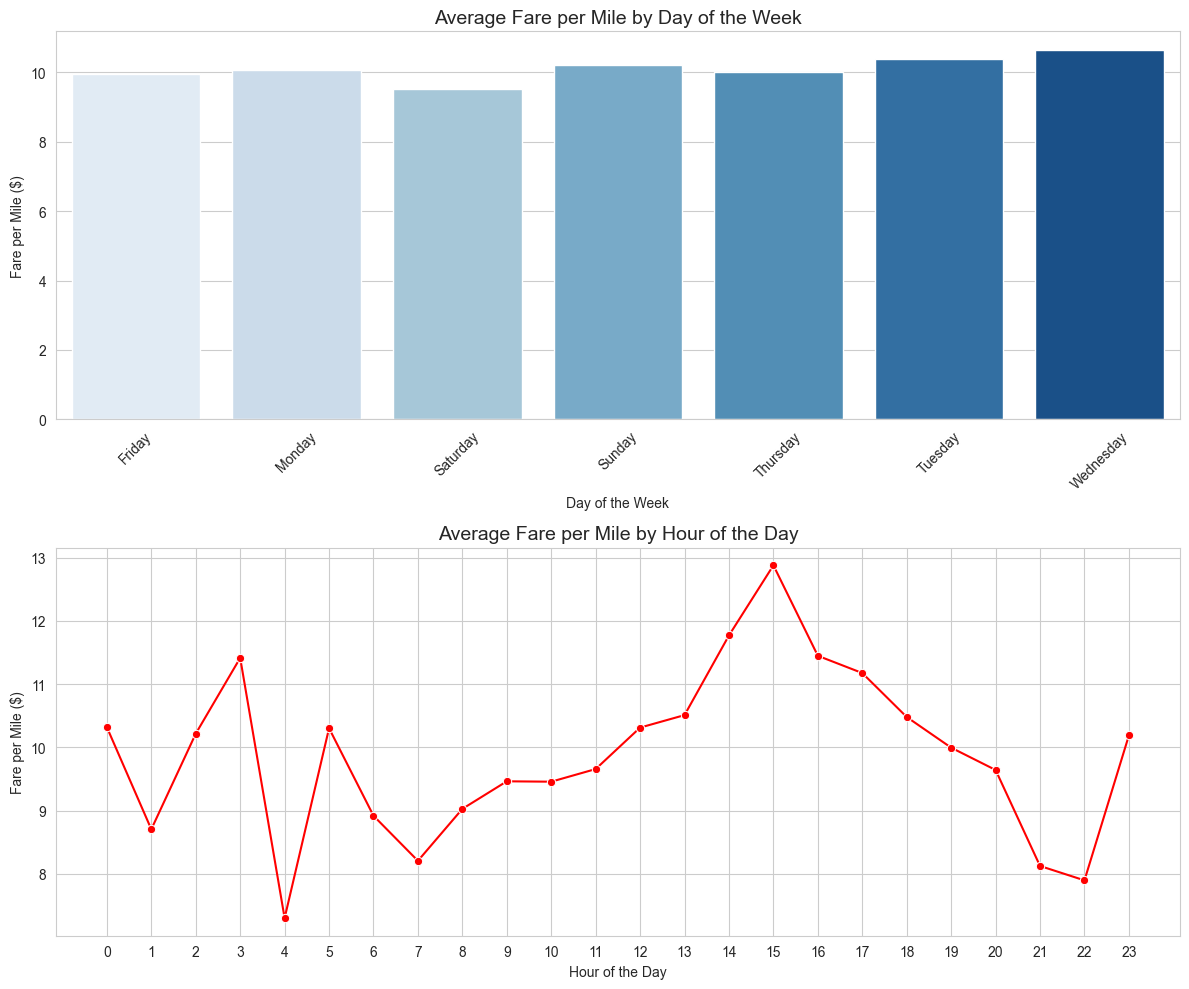

In [152]:
# Compare the average fare per mile for different days and for different times of the day

# Filter valid trips
valid_trips = df_merged[(df_merged['trip_distance'] > 0)]

# Calculate fare per mile
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Group by day of week and calculate average fare per mile
fare_per_mile_by_day = valid_trips.groupby('pickup_dayofweek')['fare_per_mile'].mean().reset_index()


# Group by hour and calculate average fare per mile
fare_per_mile_by_hour = valid_trips.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

sns.set_style('whitegrid')

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.barplot(
    data=fare_per_mile_by_day,
    x='pickup_dayofweek',
    y='fare_per_mile',
    palette='Blues',
    ax=axes[0]
)
axes[0].set_title('Average Fare per Mile by Day of the Week', fontsize=14)
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Fare per Mile ($)')
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(
    data=fare_per_mile_by_hour,
    x='pickup_hour',
    y='fare_per_mile',
    marker='o',
    color='red',
    ax=axes[1]
)
axes[1].set_title('Average Fare per Mile by Hour of the Day', fontsize=14)
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Fare per Mile ($)')
axes[1].set_xticks(range(0, 24, 1))

plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [154]:
# Compare fare per mile for different vendors

# Filter valid trips where trip_distance > 0 and fare_amount > 0
valid_vendor_trips = df_merged[(df_merged['trip_distance'] > 0) & (df_merged['fare_amount'] > 0)]

# Calculate fare per mile
valid_vendor_trips['fare_per_mile'] = valid_vendor_trips['fare_amount'] / valid_vendor_trips['trip_distance']

# Group by VendorID and calculate average fare per mile
fare_per_mile_by_vendor = valid_vendor_trips.groupby('VendorID')['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Vendor:")
print(fare_per_mile_by_vendor)


Average Fare per Mile by Vendor:
   VendorID  fare_per_mile
0         1       8.144235
1         2      10.829265
2         6       6.420587


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


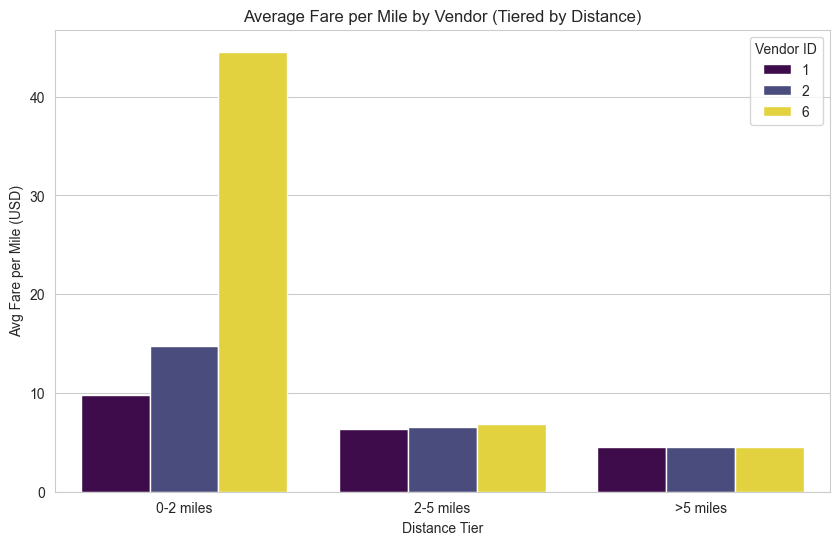

In [156]:
# Defining distance tiers
# Add a tier column based on trip_distance
def distance_tier(distance):
    if distance <= 2:
        return '0-2 miles'
    elif distance <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

valid_vendor_trips['distance_tier'] = valid_vendor_trips['trip_distance'].apply(distance_tier)

# Group by VendorID and distance tier
fare_per_mile_tiered = (
    valid_vendor_trips
    .groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
)

fare_per_mile_tiered = fare_per_mile_tiered.sort_values(['VendorID', 'distance_tier'])
fare_per_mile_tiered
plt.figure(figsize=(10,6))
sns.barplot(data=fare_per_mile_tiered, x='distance_tier', y='fare_per_mile', hue='VendorID', palette='viridis')
plt.title("Average Fare per Mile by Vendor (Tiered by Distance)")
plt.xlabel("Distance Tier")
plt.ylabel("Avg Fare per Mile (USD)")
plt.legend(title='Vendor ID')
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

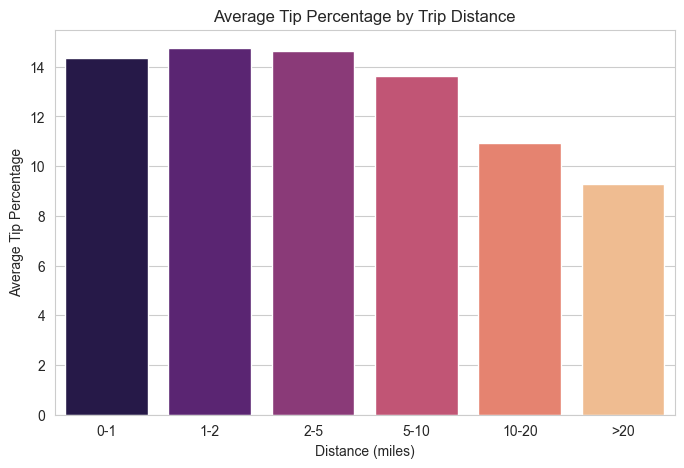

In [159]:
valid_vendor_trips = valid_vendor_trips.copy()
valid_vendor_trips['tip_percentage'] = (
    valid_vendor_trips.apply(
        lambda row: (row['tip_amount'] / (row['total_amount'] - row['tip_amount']) * 100) 
        if (row['total_amount'] - row['tip_amount']) > 0 else 0,
        axis=1
    )
)


max_distance = valid_vendor_trips['trip_distance'].max()
if max_distance <= 20:
    distance_bins = [0, 1, 2, 5, 10, 20]
    distance_labels = ['0-1', '1-2', '2-5', '5-10', '10-20']
else:
    distance_bins = [0, 1, 2, 5, 10, 20, max_distance + 1]
    distance_labels = ['0-1', '1-2', '2-5', '5-10', '10-20', f'>{int(max_distance)}']

valid_vendor_trips['distance_bin'] = pd.cut(
    valid_vendor_trips['trip_distance'],
    bins=distance_bins,
    labels=distance_labels,
    include_lowest=True
)

tip_vs_distance = (
    valid_vendor_trips.groupby('distance_bin')['tip_percentage']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(data=tip_vs_distance, x='distance_bin', y='tip_percentage', palette='magma')
plt.title("Average Tip Percentage by Trip Distance")
plt.xlabel("Distance (miles)")
plt.ylabel("Average Tip Percentage")
plt.show()

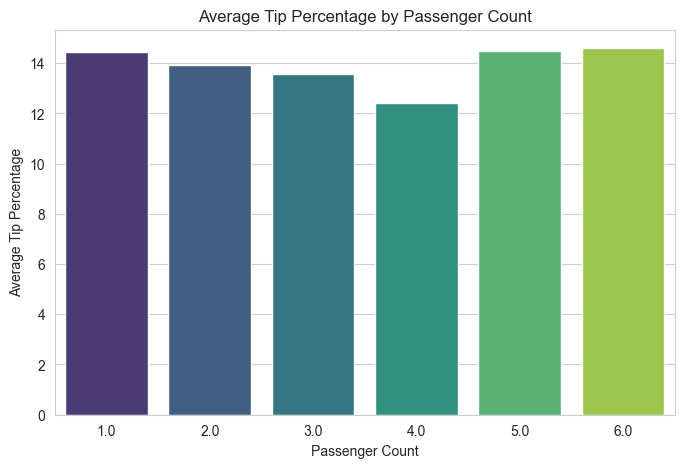

In [160]:
tip_vs_passenger = (
    valid_vendor_trips.groupby('passenger_count')['tip_percentage']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(data=tip_vs_passenger, x='passenger_count', y='tip_percentage', palette='viridis')
plt.title("Average Tip Percentage by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage")
plt.show()


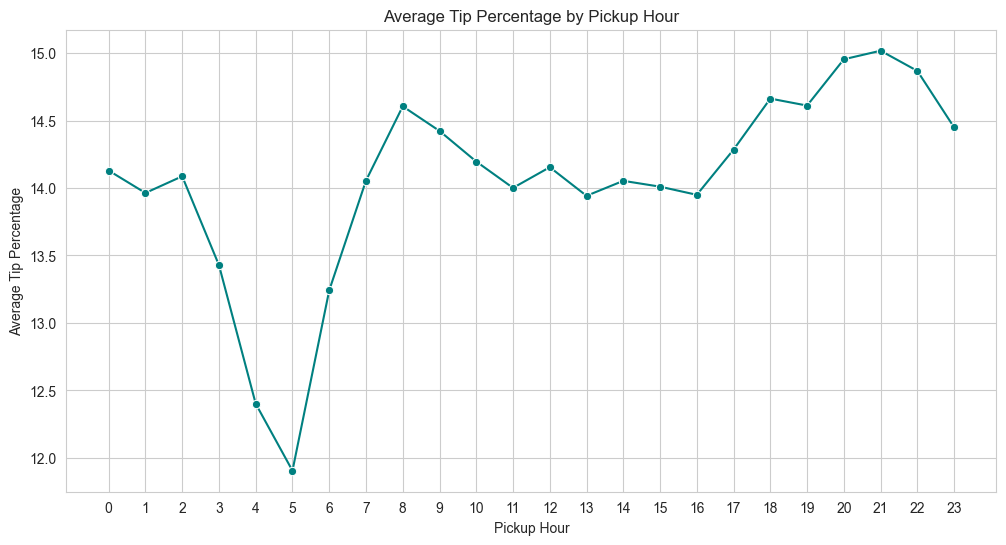

In [161]:
tip_vs_hour = (
    valid_vendor_trips.groupby('pickup_hour')['tip_percentage']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.lineplot(data=tip_vs_hour, x='pickup_hour', y='tip_percentage', marker='o', color='teal')
plt.title("Average Tip Percentage by Pickup Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Tip Percentage")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [163]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tips_10 = valid_vendor_trips[valid_vendor_trips['tip_percentage'] < 10]
high_tips_25 = valid_vendor_trips[valid_vendor_trips['tip_percentage'] > 25]



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

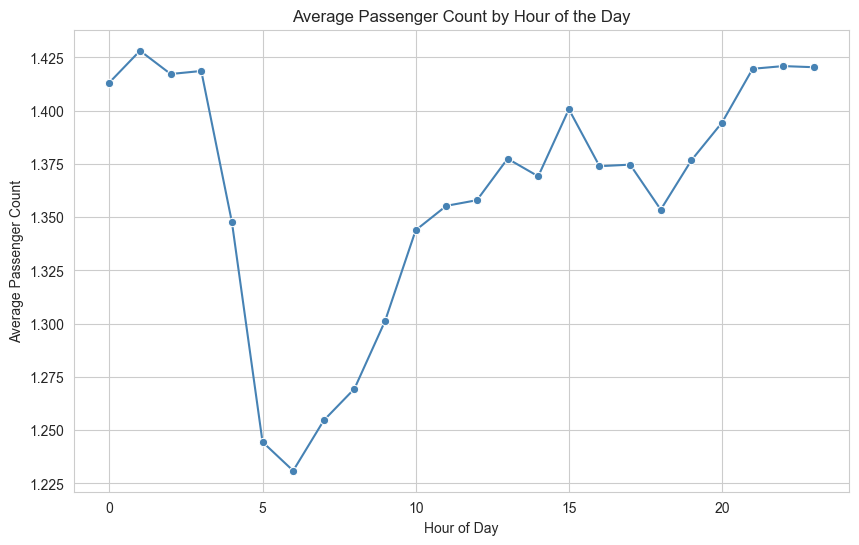

In [165]:
# See how passenger count varies across hours and days

passenger_hourly = valid_vendor_trips.groupby('pickup_hour')['passenger_count'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=passenger_hourly, x='pickup_hour', y='passenger_count', marker='o', color='steelblue')
plt.title("Average Passenger Count by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Passenger Count")
plt.grid(True)
plt.show()



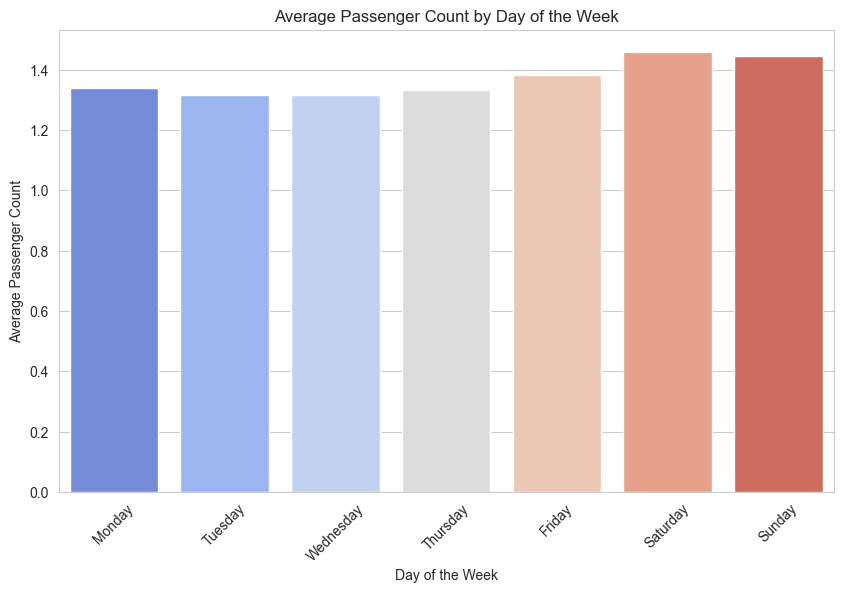

In [166]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_weekly = valid_vendor_trips.groupby('pickup_dayofweek')['passenger_count'].mean().reindex(day_order).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=passenger_weekly, x='pickup_dayofweek', y='passenger_count', palette='coolwarm')
plt.title("Average Passenger Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.xticks(rotation=45)
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

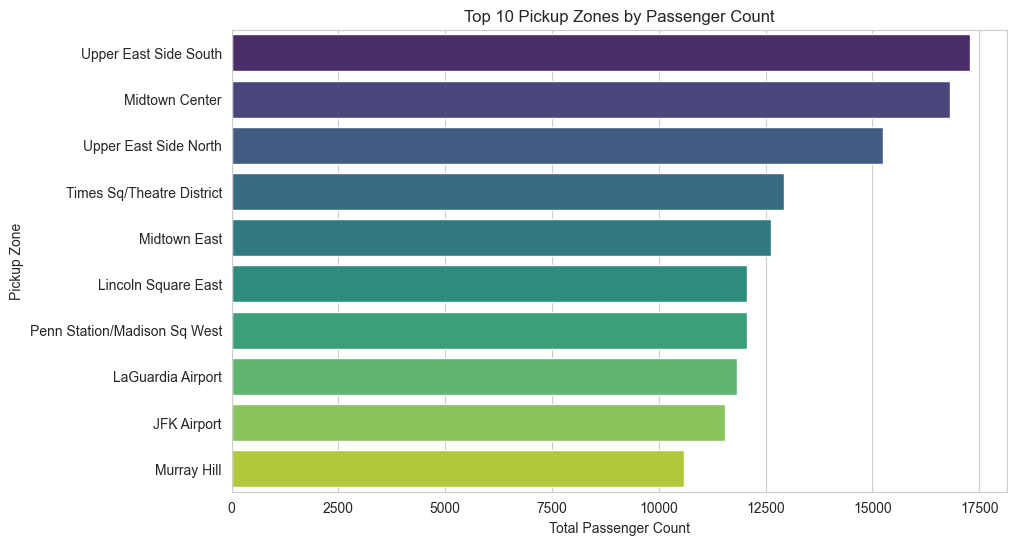

In [168]:
# How does passenger count vary across zones
passenger_count_by_zone = (
    df_merged.groupby(['PULocationID', 'zone'], as_index=False)['passenger_count']
    .sum()
    .sort_values(by='passenger_count', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=passenger_count_by_zone, x='passenger_count', y='zone', palette='viridis')
plt.title('Top 10 Pickup Zones by Passenger Count')
plt.xlabel('Total Passenger Count')
plt.ylabel('Pickup Zone')
plt.show()

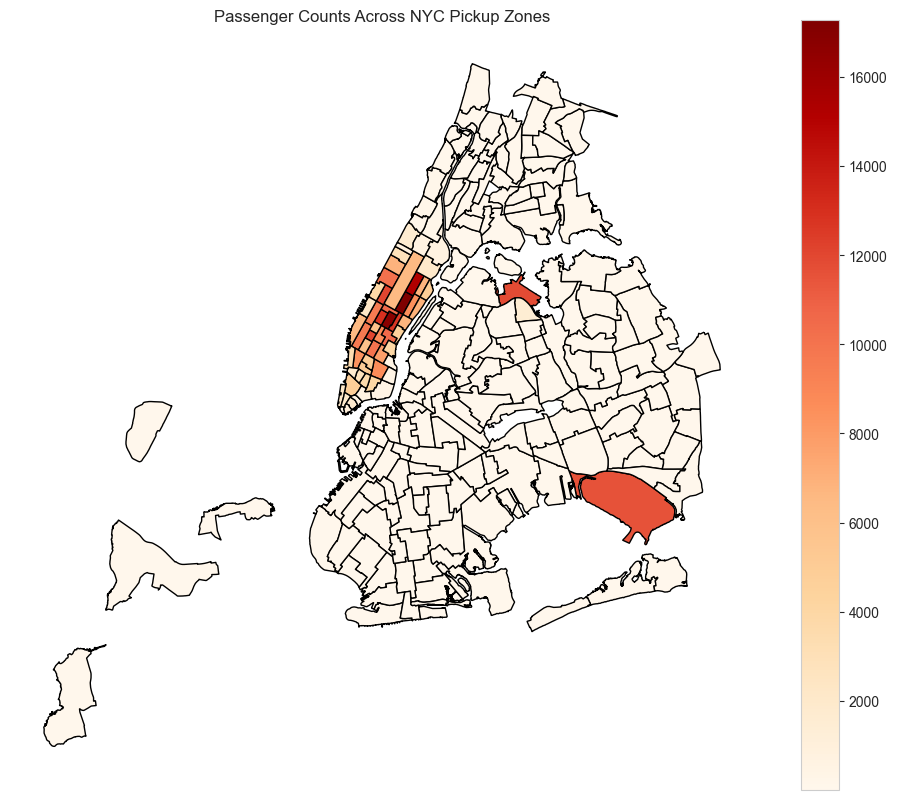

In [169]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_with_passenger = (
    df_merged.groupby(['PULocationID', 'zone'], as_index=False)['passenger_count']
    .sum()
    .sort_values(by='passenger_count', ascending=False)
)

# Merge passenger counts with geometry
zones_with_trips = zones_with_passenger.merge(
    zones, how='left', left_on='PULocationID', right_on='LocationID'
)
zones_with_trips_gdf = gpd.GeoDataFrame(zones_with_trips, geometry='geometry')

#Plot
fig, ax = plt.subplots(figsize=(12, 10))
zones_with_trips_gdf.plot(column='passenger_count', cmap='OrRd', legend=True, ax=ax, edgecolor='black')
plt.title('Passenger Counts Across NYC Pickup Zones')
plt.axis('off')
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

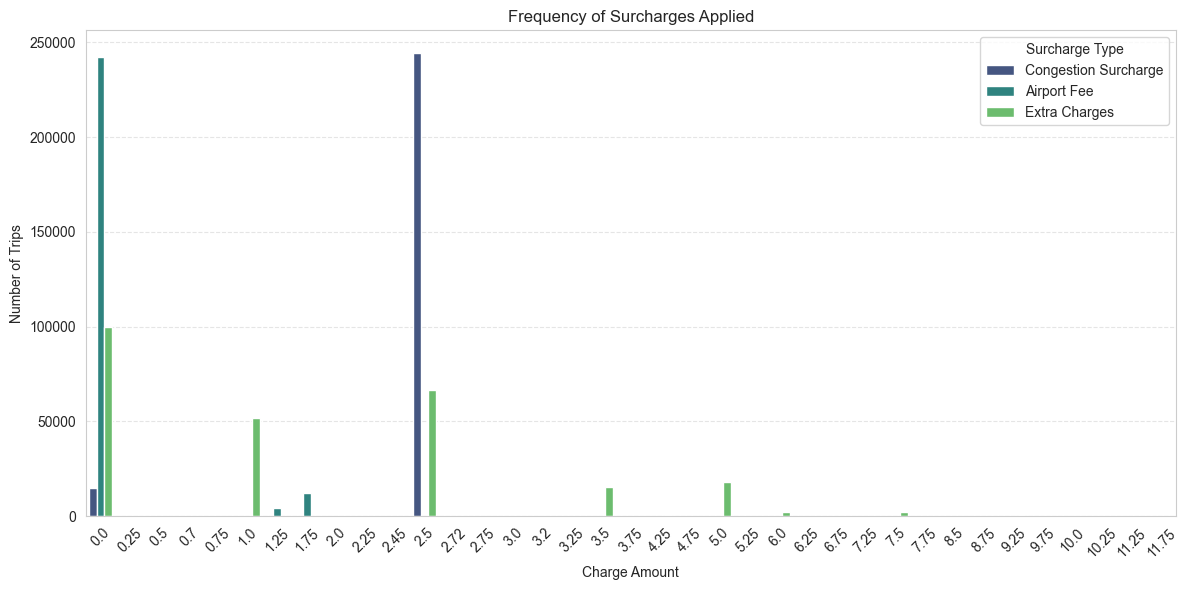

In [172]:
# How often is each surcharge applied?

# Congestion surcharge frequency
congestion_counts = valid_vendor_trips['congestion_surcharge'].value_counts().reset_index()
congestion_counts.columns = ['charge', 'count']
congestion_counts['type'] = 'Congestion Surcharge'

# Airport fee frequency
airport_fee_counts = valid_vendor_trips['airport_fee_combined'].value_counts().reset_index()
airport_fee_counts.columns = ['charge', 'count']
airport_fee_counts['type'] = 'Airport Fee'

# Extra charge frequency
extra_counts = valid_vendor_trips['extra'].value_counts().reset_index()
extra_counts.columns = ['charge', 'count']
extra_counts['type'] = 'Extra Charges'

# Combine all into one dataframe
surcharge_data = pd.concat([congestion_counts, airport_fee_counts, extra_counts])


plt.figure(figsize=(12, 6))
sns.barplot(data=surcharge_data, x='charge', y='count', hue='type', palette='viridis')
plt.title('Frequency of Surcharges Applied')
plt.xlabel('Charge Amount')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)   # rotate x-axis labels
plt.legend(title='Surcharge Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.